In [1]:
import pandas as pd
import matplotlib.pyplot as plt

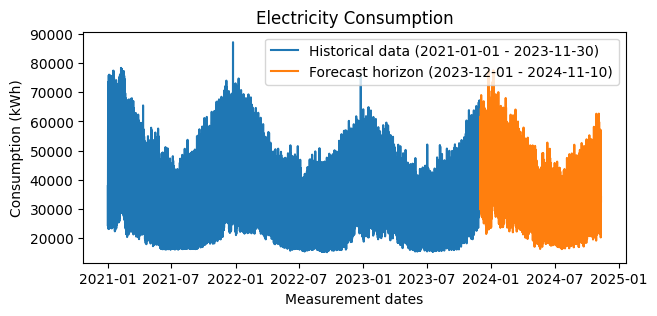

In [19]:
df = pd.read_csv('../Dataset/ConsumptionIndustry.csv', sep=';')

df['HourDK'] = pd.to_datetime(df['HourDK'])
df['ConsumptionkWh'] = df['ConsumptionkWh'].str.replace(",", ".").astype(float)

train_start = "2021-01-01"
train_end = "2023-11-30"
test_start = "2023-12-01"
test_end = "2024-11-10"

df.index = df['HourDK']

df.drop(columns=['HourUTC', 'HourDK', 'MunicipalityNo', 'Branche'], inplace=True)
data_train = df[(df.index >= train_start) & (df.index <= train_end)]
data_test = df[(df.index >= test_start) & (df.index <= test_end)]

df = df['ConsumptionkWh']
plt.figure(figsize=(7, 3))
plt.plot(data_train.index, data_train['ConsumptionkWh'], label=f'Historical data ({train_start} - {train_end})')
plt.plot(data_test.index, data_test['ConsumptionkWh'], label=f'Forecast horizon ({test_start} - {test_end})')
plt.title('Electricity Consumption')
plt.xlabel('Measurement dates')
plt.ylabel('Consumption (kWh)')
plt.legend()
plt.show()


Training Set: 25513 rows
Test Set: 8281 rows


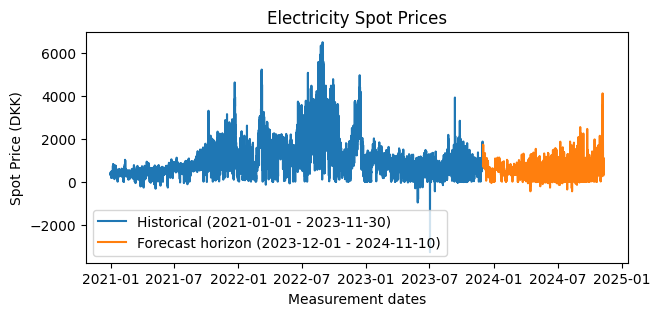

In [20]:
# Correct the file path to the actual location of the CSV file
df = pd.read_csv('../Dataset/ELSpotPrices.csv', sep=';')

# # Convert HourDK to datetime
df['HourDK'] = pd.to_datetime(df['HourDK'])
df['SpotPriceDKK'] = df['SpotPriceDKK'].str.replace(",", ".").astype(float)

train_start = "2021-01-01"
train_end = "2023-11-30"
test_start = "2023-12-01"
test_end = "2024-11-10"

df.index = df['HourDK']

df.drop(columns=['HourUTC', 'HourDK', 'PriceArea', 'SpotPriceEUR'], inplace=True)
data_train = df[(df.index >= train_start) & (df.index <= train_end)]
data_test = df[(df.index >= test_start) & (df.index <= test_end)]

print(f"Training Set: {data_train.shape[0]} rows")
print(f"Test Set: {data_test.shape[0]} rows")
df = df['SpotPriceDKK']
plt.figure(figsize=(7, 3))
plt.plot(data_train.index, data_train['SpotPriceDKK'], label=f'Historical ({train_start} - {train_end})')
plt.plot(data_test.index, data_test['SpotPriceDKK'], label=f'Forecast horizon ({test_start} - {test_end})')
plt.title('Electricity Spot Prices (DK1)')
plt.xlabel('Measurement dates')
plt.ylabel('Spot Price (DKK)')
plt.legend()
plt.show()
